In [ ]:
%matplotlib inline

from os.path import join, dirname

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

matplotlib.style.use('seaborn-ticks')

In [34]:
#
# Show some data captured from the video
#

# load data file create by module 052
columns = ["frame", "time from t0", "diffs percentage",
                    "mean diff", "variance from t-1 abs"]
df = pd.read_csv("its-alive-zoom-stats2.csv")[498:3000]
df.set_index("frame", verify_integrity=True)

# slice dataset from frame 500 to 3000
df2 = pd.DataFrame({
    "variance from previous frame": df["variance from t-1 abs"],
    "over or under mid range": df["over/under mid range"]},
    index=df["frame"]
)

# some data on variance computed on differences and the mean of percentage of changed
# pixels between t and t-1 
print(df[:][columns])

      frame  time from t0  diffs percentage  mean diff  variance from t-1 abs
498     500         20.83          0.113416   0.107144           9.372262e-10
499     501         20.88          0.113448   0.107157           3.333790e-10
500     502         20.92          0.113365   0.107169           2.520994e-09
501     503         20.96          0.113402   0.107181           4.487799e-10
502     504         21.00          0.113402   0.107194           4.570500e-10
...     ...           ...               ...        ...                    ...
2995   2997        124.88          0.154293   0.136030           1.172673e-09
2996   2998        124.92          0.154293   0.136036           1.113258e-10
2997   2999        124.96          0.154063   0.136042           2.886802e-09
2998   3000        125.00          0.153893   0.136048           2.138248e-09
2999   3001        125.04          0.153843   0.136054           7.054856e-10

[2502 rows x 5 columns]


In [31]:
# synthetised data: variance and flag for frames exceeding variance mid range
print(df2.head())

       variance from previous frame  over or under mid range
frame                                                       
502                    4.570500e-10                      0.0
503                    2.060695e-08                      1.0
504                    5.412512e-11                      0.0
505                    8.090919e-10                      0.0
506                    5.150551e-10                      0.0


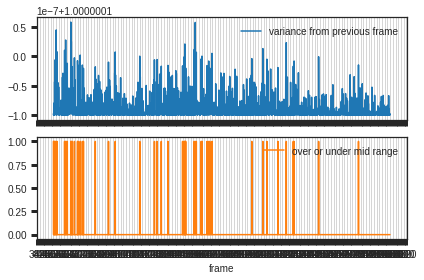

In [5]:
#
# Plot variance and clusters of frames exceeding mid range variance
#

fig1, fig2 = df2.plot(subplots=True, layout=(2, 1), sharex=True)

fig1[0].xaxis.grid(True)
fig2[0].xaxis.grid(True)

fig1[0].tick_params(which='both', width=3)
fig2[0].tick_params(which='both', width=3)

fig2[0].xaxis.set_major_locator(MultipleLocator(20))
fig2[0].plot(table=True)

plt.tight_layout()
plt.show()




In [20]:
peacks = df.loc[df['over/under mid range'] == 1]
print(peacks)

      frame  time from t0  diffs percentage  mean diff  variance from t-1 abs  \
500     502         20.92          0.113365   0.107169           2.520994e-09   
503     505         21.04          0.112516   0.107204           2.060695e-08   
509     511         21.29          0.114798   0.107271           5.672061e-08   
513     515         21.46          0.117824   0.107338           9.410013e-08   
521     523         21.79          0.113067   0.107490           1.447870e-07   
527     529         22.04          0.117121   0.107564           1.076065e-07   
583     585         24.38          0.120193   0.108653           1.103371e-07   
591     593         24.71          0.115395   0.108796           1.277029e-07   
595     597         24.88          0.118209   0.108846           7.272315e-08   
603     605         25.21          0.120872   0.108976           8.820696e-08   
629     631         26.29          0.116933   0.109462           1.581570e-07   
633     635         26.46   